### Regresion Lineal
---
#### Representación del modelo

El primer algoritmo que aprenderemos será la <b>regresión lineal</b>. Veremos como se representan los modelos y como es el proceso en general de aprendizaje supervisado.

Para este caso tomaremos como ejemplo un dataset tomado de la biblioteca `sklearn`

In [1]:
from pylab import *

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Aqui tenemos nuestros datos cargados en la variable `boston`. Para este ejemplo solamente trabajaremos con el número medio de habitaciones `RM` y el precio de la casa `MEDV`

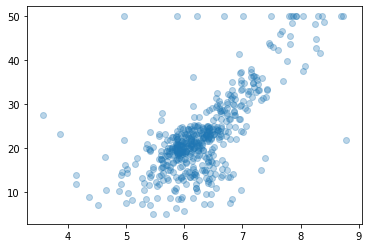

In [7]:
scatter(boston['RM'], boston['MEDV'], alpha=0.3)
show()

Tenemos en el eje horizontal el número medio de habitaciones y en el eje vertical el precio.

Este es un ejemplo donde podemos utilizar un algoritmo de aprendizaje supervisado, ya que tenemos la "respuesta correcta" para cada uno de nuestros ejemplos. Es decir tenemos cuál fué el precio real en que se vendió cada casa. Además es un ejemplo de problema de regresión.

En aprendizaje supervisado tenemos un conjunto de datos de entrenamiento y el trabajo del algoritmo es aprender, a partir de estos datos, cómo predecir los precios de las viviendas.

El trabajo de nuestro algoritmo es producir una función que llamaremos por convención $h$ ($h$ se refiere a hipótesis). Nuestra hipótesis tomará como entrada el número medio de habitaciones $x$ y tratará de estimar un precio $y$ para la casa correspondiente.

Al diseñar un algoritmo de aprendizaje lo siguiente a decidir es cómo representar esta hipótesis $h$. Para este caso escogeremos la siguiente representación.

### $$ h_\theta(x) = \theta_0 + \theta_1x $$

Y esta representación corresponde a una función lineal recta. En ocasiones queremos ajustar funciones más complicadas no lineales. Pero para este ejemplo básico comenzaremos aprendiendo a ajustar funciones lineales, y posteriormente desarrollaremos funciones y algoritmos más complejos. Este modelo se llama regresión lineal, y este en especial es una regresión lineal real con una variable

---

#### Función de costo

En nuestro modelo de regresión tenemos las variables $\theta_0$ y $\theta_1$ estos son los llamados parámetros del modelo. Lo que aprenderemos será como escoger estos parámetros para que se ajuste mejor nuestro modelos a nuestros datos.

Con diferentes elecciones de los parámetros tenemos diferentes hipótesis:

In [8]:
def h(x, t0, t1):
    return t0+t1*x

X = array(range(0, 4))

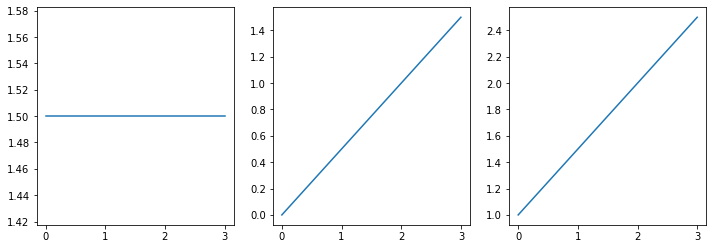

In [9]:
_, (ax1, ax2, ax3) = subplots(1, 3, figsize=(12,4))

ax1.plot(X, h(X, 1.5, 0)) # t0 = 1.5 t1 = 0
ax2.plot(X, h(X, 0, 0.5)) # t0 = 0 t1 = 0.5
ax3.plot(X, h(X, 1, 0.5)) # t0 = 1 t1 = 0.5

show()

Entonces lo que queremos hacer es obtener los parámetros de $\theta_0$ y $\theta_1$. De manera que la línea recta que obtenemos se ajuste lo mejor posible a nuestros datos. Entonces ¿cómo obtenemos estos valores?. La idea es que vamos a elegir nuestros parámetros de modo que $h(x)$, que sería el valor que nos devuelve nuestra función de hipótesis, esté lo más cerca posible del valor real $y$ que tenemos en nuestro conjunto de datos. 

Lo que queremos resolver realmente es un problema de minimización, lo que queremos es que esto: $h(x) - y$ sea lo más pequeño posible. Entonces lo que haremos será minimizar la diferencia cuadrática entre el resultado de la hipótesis y el valor real.

### $$ {min\over{\theta_0 \theta_1}} \sum_{i=1}^{n} (h_\theta(x_i)-y_i)^2$$

Solo que para simplificar nuetra ecuación la transformaremos de la siguiente manera:

### $$ {min\over{\theta_0 \theta_1}} {1\over2m} \sum_{i=1}^{n} (h_\theta(x_i)-y_i)^2$$

Así estamos tratando de minimizar el error promedio y esto hace que las matemáticas sean más fáciles.

A esta función la denotaremos como $J(\theta_0,\theta_1)$ y la llamaremos función de costo. Así que lo que queremos hacer es minimizar sobre nuestros parámetros la función de costo. 

Esta función de costo en particular es conocida como error cuadrático medio.

#### Resumen:

##### Hipótesis:
### $$ h_\theta(x) = \theta_0 + \theta_1x $$

##### Parámetros:
### $$\theta_0, \theta_1$$

##### Función de costo:
### $$J(\theta_0,\theta_1) = {1\over2m} \sum_{i=1}^{n} (h_\theta(x_i)-y_i)^2$$

##### Objetivo:
### $${min\over{\theta_0 \theta_1}} J(\theta_0,\theta_1)$$